In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import tensorflow as tf

In [2]:
TrainSet=pd.read_excel("Data_Train.xlsx")
TestSet=pd.read_excel("Test_set.xlsx")

In [3]:
OriginalTrain=TrainSet.copy()
OriginalTest=TestSet.copy()

# EDA & FeatureEngineering

In [4]:
TrainSet.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
TestSet.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
TrainSet.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
TrainSet.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### There is only two records which has missing value , so i am going to drop those rows 

In [9]:
TrainSet=TrainSet.dropna()

In [10]:
TestSet.isna().sum().sum()

0

In [11]:
TrainSet.isna().sum().sum()

0

### Encoding and make sense

In [12]:
TrainSet['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

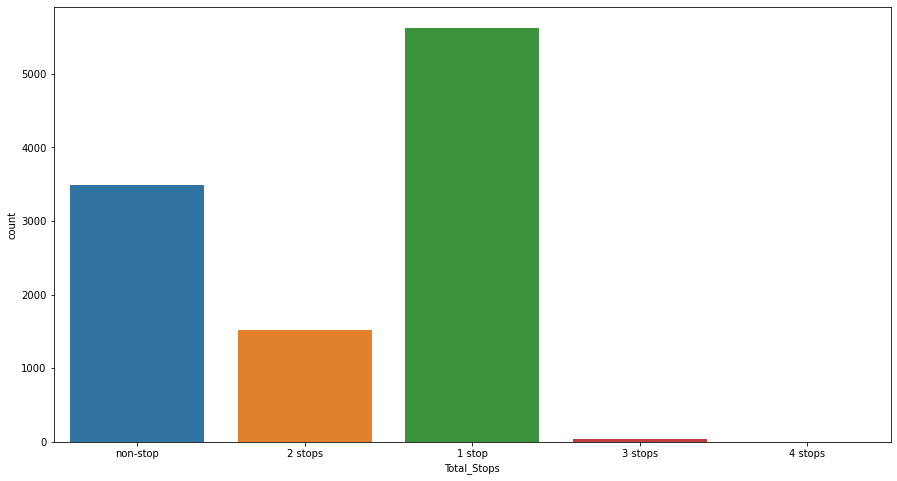

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x=TrainSet['Total_Stops'])
plt.show()

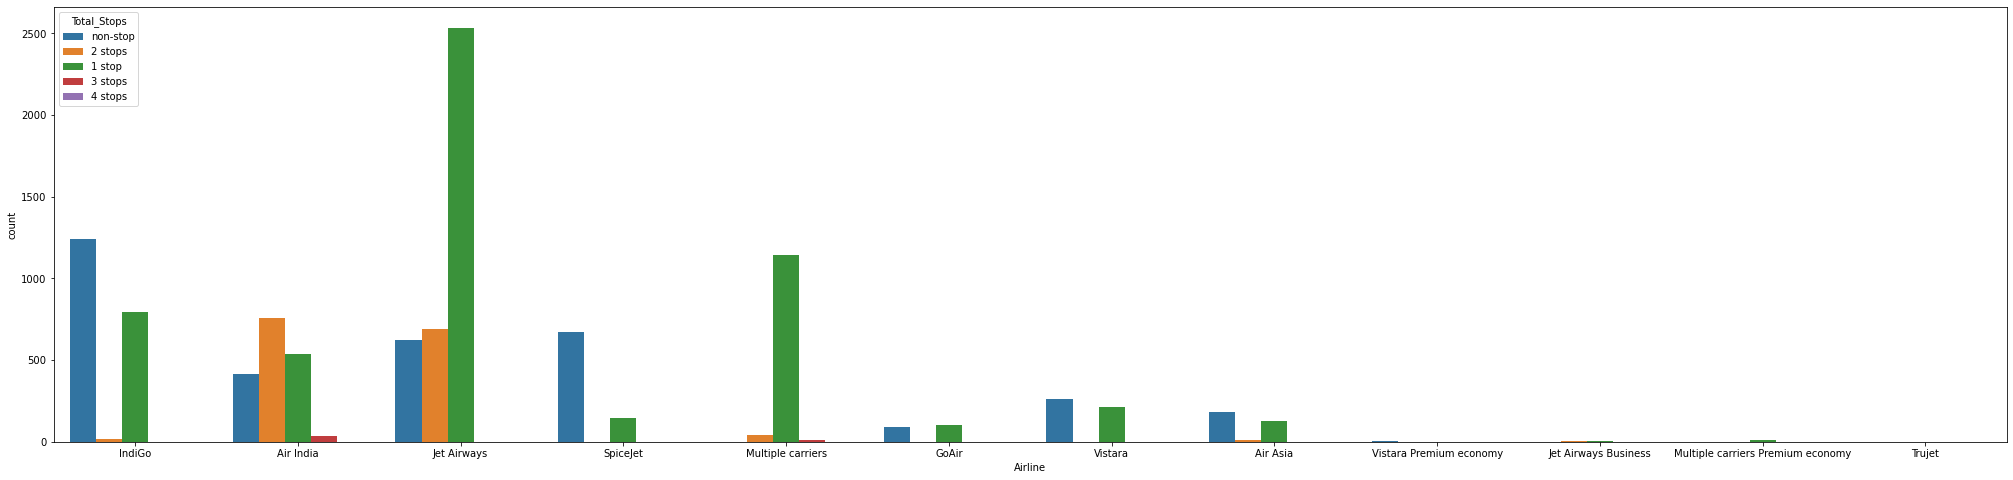

In [14]:
plt.figure(figsize=(35,8))
sns.countplot(x=TrainSet['Airline'],hue=TrainSet['Total_Stops'])
plt.show()

In [15]:
TrainSet['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
def TotalStopEncode(DataFrame):
    DataFrame['Total_Stops']=DataFrame['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [17]:
# we can simply map those with integer values 
TotalStopEncode(TrainSet)

In [18]:
TrainSet.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [19]:
TrainSet['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [20]:
TotalStopEncode(TestSet)

In [21]:
TrainSet

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


##### going to extract information from Date_of_Journey like year,month,date

In [22]:
TrainSet['day']=TrainSet['Date_of_Journey'].map(lambda x:x.split('/')[0])
TrainSet['month']=TrainSet['Date_of_Journey'].map(lambda x:x.split('/')[1])
TrainSet['year']=TrainSet['Date_of_Journey'].map(lambda x:x.split('/')[2])
TestSet['day']=TestSet['Date_of_Journey'].map(lambda x:x.split('/')[0])
TestSet['month']=TestSet['Date_of_Journey'].map(lambda x:x.split('/')[1])
TestSet['year']=TestSet['Date_of_Journey'].map(lambda x:x.split('/')[2])

In [23]:
TrainSet.drop(columns=['Date_of_Journey'],axis=1,inplace=True)
TestSet.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [24]:
TrainSet

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,04,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,04,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,04,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,01,03,2019


### going to handle Duration column , Plan to convert to minutes

In [25]:
TrainSet["DurationM"]=TrainSet['Duration'].apply(lambda x:eval(x.replace("h","*60").replace("m","*1").replace(" ","+")))
TestSet["DurationM"]=TestSet['Duration'].apply(lambda x:eval(x.replace("h","*60").replace("m","*1").replace(" ","+")))

In [26]:
# drop Duration column
TrainSet.drop(columns=['Duration'],axis=1,inplace=True)
TestSet.drop(columns=['Duration'],axis=1,inplace=True)

In [27]:
TrainSet

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,year,DurationM
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897,24,03,2019,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662,1,05,2019,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882,9,06,2019,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218,12,05,2019,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302,01,03,2019,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,No info,4107,9,04,2019,150
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,No info,4145,27,04,2019,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0,No info,7229,27,04,2019,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,0,No info,12648,01,03,2019,160


### going to handle Dep_Time and Arrival_Time -> 

In [28]:
TrainSet['DepTime_H']=TrainSet['Dep_Time'].map(lambda x:x.split(":")[0])
TrainSet['DepTime_M']=TrainSet['Dep_Time'].map(lambda x:x.split(":")[1])
TestSet['DepTime_H']=TestSet['Dep_Time'].map(lambda x:x.split(":")[0])
TestSet['DepTime_M']=TestSet['Dep_Time'].map(lambda x:x.split(":")[1])

In [29]:
TrainSet.drop(columns=['Dep_Time'],axis=1,inplace=True)
TestSet.drop(columns=['Dep_Time'],axis=1,inplace=True)

In [30]:
TrainSet['Arrival_H']=TrainSet['Arrival_Time'].map(lambda x:x.split(":")[0])
TrainSet['Arrival_M']=TrainSet['Arrival_Time'].map(lambda x:x.split(":")[1].split(" ")[0])
TestSet['Arrival_H']=TestSet['Arrival_Time'].map(lambda x:x.split(":")[0])
TestSet['Arrival_M']=TestSet['Arrival_Time'].map(lambda x:x.split(":")[1].split(" ")[0])

In [31]:
# i am going to drop Route because i have number of stop station , 
TestSet.drop(columns=['Arrival_Time','Route'],axis=1,inplace=True)
TrainSet.drop(columns=['Arrival_Time','Route'],axis=1,inplace=True)

In [32]:
TrainSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  int64 
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   day              10682 non-null  object
 7   month            10682 non-null  object
 8   year             10682 non-null  object
 9   DurationM        10682 non-null  int64 
 10  DepTime_H        10682 non-null  object
 11  DepTime_M        10682 non-null  object
 12  Arrival_H        10682 non-null  object
 13  Arrival_M        10682 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.2+ MB


In [33]:
X_Train=TrainSet.drop(columns=['Price'],axis=1)
Y_Train=TrainSet[['Price']]

### now going to encode remaining column ,

In [34]:
col=['Airline','Source','Destination','Additional_Info']

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
onhot=OneHotEncoder(handle_unknown='ignore')
clt=ColumnTransformer(transformers=[
    ('encoding',onhot,col)
],remainder='passthrough')

In [37]:
X_Train_Array=clt.fit_transform(X_Train)
Test_Array=clt.transform(TestSet)

In [38]:
X_Train_Array=X_Train_Array.astype('float64')
Test_Array=Test_Array.astype('float64')

In [39]:
X_Train_Array.shape

(10682, 42)

In [40]:
Test_Array.shape

(2671, 42)

### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Train_ArraySC=sc.fit_transform(X_Train_Array)
Test_ArraySC=sc.fit_transform(Test_Array)

### Training and tuning

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [49]:
models={'RandomForest':RandomForestRegressor(),'SVR':SVR(),'linear':LinearRegression(),'xgbReg':XGBRegressor()}

In [50]:
for val in models.values():
    print("................... i am ",val)
    print("average mean is ", cross_val_score(val,X_Train_Array,Y_Train,cv=3).mean())
    print("std is ", cross_val_score(val,X_Train_Array,Y_Train,cv=3).std())
    print('\n')

................... i am  RandomForestRegressor()


C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


average mean is  0.8822932095698747


C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


std is  0.015574033714899033


................... i am  SVR()


C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


average mean is  0.04520624747937211


C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


std is  0.007552078784543925


................... i am  LinearRegression()
average mean is  -491091257541001.0
std is  694507916777343.1


................... i am  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
average mean is  0.8925884586511312
std is  0.005871695021089142




In [45]:
# validation with scaled value
for val in models.values():
    score=cross_val_score(val,X_Train_ArraySC,Y_Train,cv=3)
    print("................... i am ",val)
    print("average mean is ", score.mean())
    print("std is ", score.std())
    print('\n')

C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


................... i am  RandomForestRegressor()
average mean is  0.8831159274986123
std is  0.01561963709963764




C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


................... i am  SVR()
average mean is  0.0416431398846574
std is  0.008385920239342048


................... i am  LinearRegression()
average mean is  -8.461072232526093e+25
std is  7.978595795632425e+25




In [46]:
from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [100,200,300,400,500],
#     'max_depth' : [3,4,5,6,7],
    
}

gridcv=GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid,cv=3)

In [59]:
gridcv.fit(X_Train_Array,Y_Train)

C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selec

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [60]:
gridcv.best_score_

0.8834028575796607

In [61]:
gridcv.best_params_

{'n_estimators': 500}

In [47]:
# grrid search with scaled values
gridcv.fit(X_Train_ArraySC,Y_Train)

C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Keerththanan\MYPROGRAM\Annaconda\lib\site-packages\sklearn\model_selec

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [49]:
gridcv.best_score_

0.8833864978790283

In [54]:
X_Train_ArraySC.shape

(10682, 42)

In [142]:
from sklearn.preprocessing import StandardScaler
scy=StandardScaler()
Y_Train_SC=scy.fit_transform(Y_Train)

### Neural network

In [160]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(524,input_shape=(42,),activation='relu'),
    tf.keras.layers.Dropout(0.01),
     tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(128,activation='relu'),
     tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear'),
    
])

In [166]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 42)                0         
                                                                 
 dense_79 (Dense)            (None, 524)               22532     
                                                                 
 dropout_15 (Dropout)        (None, 524)               0         
                                                                 
 dense_80 (Dense)            (None, 128)               67200     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 128)               16512     
                                                                 
 dense_82 (Dense)            (None, 64)              

In [161]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='mse')

In [162]:
model.fit(X_Train_ArraySC,Y_Train_SC,epochs=50,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/50
268/268 [==============================] - 2s 6ms/step - loss: 0.3203 - val_loss: 0.3174
Epoch 2/50
268/268 [==============================] - 1s 6ms/step - loss: 0.2257 - val_loss: 0.2993
Epoch 3/50
268/268 [==============================] - 2s 6ms/step - loss: 0.2219 - val_loss: 0.2277
Epoch 4/50
268/268 [==============================] - 1s 5ms/step - loss: 0.1809 - val_loss: 0.1750
Epoch 5/50
268/268 [==============================] - 1s 5ms/step - loss: 0.1894 - val_loss: 0.1823
Epoch 6/50
268/268 [==============================] - 1s 5ms/step - loss: 0.1706 - val_loss: 0.1724
Epoch 7/50
268/268 [==============================] - 1s 3ms/step - loss: 0.1609 - val_loss: 0.1649
Epoch 8/50
268/268 [==============================] - 2s 6ms/step - loss: 0.1631 - val_loss: 0.2091
Epoch 9/50
268/268 [==============================] - 2s 6ms/step - loss: 0.1411 - val_loss: 0.1511
Epoch 10/50
268/268 [==============================] - 2s 6ms/step - loss: 0.1374 - val_loss: 0.1783

In [163]:
from sklearn.metrics import r2_score

In [164]:
r2_score(Y_Train_SC,model.predict(X_Train_ArraySC))

334/334 [==============================] - 1s 2ms/step


0.9101411878976479